# Project: Titanic Survival Exploration

In 1912, the ship RMS Titanic struck an iceberg on its maiden voyage and sank, resulting in the deaths of most of its passengers and crew. In this introductory project, we will explore a subset of the RMS Titanic passenger manifest to determine which features best predict whether someone survived or did not survive.

이 프로젝트에서는 RMS Titaninc 승객 명단의 일부를 탐구하여 어떤 사람이 생존했는지 살아남지 않았는지를 가장 잘 예측할 수 있는지 판단한다.

## Getting Started

To begin working with the RMS Titanic passenger data, we'll first need to import the funcionally we need, and load our data into a pandas DataFrame.
Run the code cell below to load our data and display the first few entries(passengers) for examination using the .head() function.

RMS Titanic 승객 데이터 작업을 시작하려면 먼저 필요한 데이터를 가져와 pandas DataFrame에 로드해야한다.
아래의 code cell을 실행하여 데이터를 로드하고 .head() 함수를 사용하여 몇 개의 항목(승객)을 표시한다.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
from IPython.display import display # Allows the use of display() for DataFrames

# Import supplementary visualizations code visuals.py
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

# Load the dataset
in_file = 'titanic_data.csv'
full_data = pd.read_csv(in_file)

# Print the first few entries of the RMS Titanic data
display(full_data.head())

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


From a sample of the RMS Titanic data. we cam see the various features present for each passenger on the ship:

- **Survived**: Outcome of survival (0 = No; 1 = Yes)
- **Pclass**: Socio-economic class (1 = Upper class; 2 = Middle class; 3 = Lower class)
- **Name**: Name of passenger
- **Sex**: Sex of the passenger
- **Age**: Age of the passenger (Some entries contain NaN)
- **SibSp**: Number of siblings and spouses of the passenger aboard
- **Parch**: Number of parents and children of the passenger aboard
- **Ticket**: Ticket number of the passenger
- **Fare**: Fare paid by the passenger
- **Cabin**: Cabin number of the passenger (Spme entires contain NaN)
- **Embarked**: Port of embarkation of the passenger (C = Cherbourg; Q = Queenstown; S = Southampton)

Since we're interested in the outcome of survival for each passenger or crew member, we can remove the **Survived** feature from this dataset and store it as its own separate variavle outcomes. We will use these outcomes as our prediction targets.
Run the code cell below to remove **Survived** as a feature of the datatset and store it in outcomes.

각 승객 또는 승무원의 생존 결과에 관심이 있기에 **Survived** feature을 dataset에서 제거하고 별도의 outcomes로 저장한다. 그리고 이러한 결과를 예측 타겟으로 사용할 것이다.
아래의 code cell을 실행하여 dataset의 **Survived** feature를 제거하고 outcomes에 저장하라.


In [2]:
# Store the 'Survived' feature in a new variable and remove it from the dataset
outcomes = full_data['Survived']
data = full_data.drop('Survived', axis = 1)

# Show the new dataset with 'Survived' removed
display(data.head())

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The very same sample of the RMS Titanic data now shows the **Survived** feature removed from the DataFrame. Note that data (the passenger data) and outcomes (the outcomes of survival) are now paired. That means for any passenger data.loc[i], they have the survival outcome outcomes[i].

RMS Titanic data의 동일한 샘플에는 이제 DataFrame에서 제거된 **Survived** feature 기능이 표시된다. data(승객 data)와 outcomes(생존의 outcomes)가 이제 짝을 이루게 된다. 그건 모든 승객 data.loc[i]를 의미하고 생존 결과 outcome[i]를 가진다.

To measure the performance of our predictions, we need a metric to score our predictions against the true outcomes of survival. Since we are interested in how accurate our predictions are, we will calculate the proportion of passengers where our prediction of their survival is correct. Run the code cell below to create our accuracy_score function and test a prediction on the first five passengers.

예측의 성능을 측정하려면 진짜 생존 결과들과 비교해서 우리의 예측 수치를 매길 측정 기준이 필요하다. 예측이 얼마나 정확한지 아는 것이 목표이기 때문에 생존 예측이 맞는 승객 비율을 계산할 것이다. 아래의 code shell을 실행하여 accuracy_score 함수를 만들고 다섯 명의 승객에 대한 예측을 테스트한다.

In [3]:
def accuracy_score(truth, pred):
    """ Returns accuracy score for input truth and predictions. """
    
    # Ensure that the number of predictions matches number of outcomes
    if len(truth) == len(pred): 
        
        # Calculate and return the accuracy as a percent
        return "Predictions have an accuracy of {:.2f}%.".format((truth == pred).mean()*100)
    
    else:
        return "Number of predictions does not match number of outcomes!"
    
# Test the 'accuracy_score' function
predictions = pd.Series(np.ones(5, dtype = int))
print accuracy_score(outcomes[:5], predictions)

Predictions have an accuracy of 60.00%.


## Making Predictions

If we were asked to make a prediction about any passenger aboard the RMS Titanic whom we knew nothing about, then the best prediction we could make would be that they did not survive. This is because we can assume that a majority of the passengers (more than 50%) did not survive the ship sinking.
The predictions_0 function below will always predict that a passenger did not survive.

우리가 알지 못했던 RMS Titanic 탑승자에 대한 예측을 요구 받았다면 우리가 할 수 있는 최선의 예측은 그들이 살아남지 못했다는 것이다. 왜냐하면 승객의 대다수(50% 이상)가 침몰중인 배에서 살아남지 못했다고 추정할 수 있기 때문이다.
아래의 predictions_0 함수는 승객이 생존하지 못했다고 항상 예측할 것이다.

In [4]:
def predictions_0(data):
    """ Model with no features. Always predicts a passenger did not survive. """

    predictions = []
    for _, passenger in data.iterrows():
        
        # Predict the survival of 'passenger'
        predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_0(data)

### Question 1

*Using the RMS Titanic data, how accurate would a prediction be that none of the passengers survived?*

In [5]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 61.62%.


**Answer**: *Predictions have an accuracy of 61.62%.*

---
Let's take a look at whether the feature **Sex** has any indication of survival rates among passengers using the survival_stats function. This function is defined in the visuals.py Python script included with this project. The first two parameters passed to the function are the RMS Titanic data and passenger survival outcomes, respectively. The third parameter indicates which feature we want to plot survival statistics across.
Run the code cell below to plot the survival outcomes of passengers based on their sex.

survival_stats 함수를 사용하여 **Sex** feature이 승객들에 대한 생존율의 지표가 있는지 없는지 알아보자. 이 함수는 프로젝트에 포함된 visuals.py에 정의되어 있다. 이 함수에 전달된 첫 번째 두 매개변수들은 RMS Titanic data와 승객 생존 결과이다. 세 번쨰 매개변수는 생존 통계를 그릴 feature을 나타낸다.
아래의 code cell 을 실행하여 성별에 따라 승객의 생존 결과를 나타내어라.

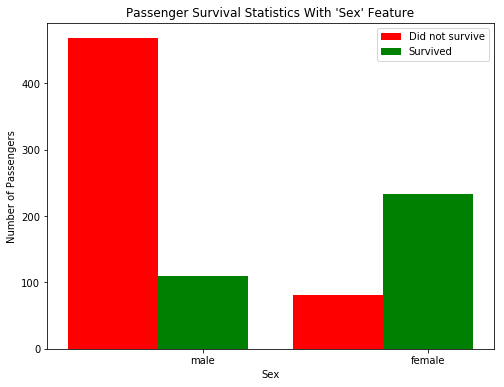

In [6]:
vs.survival_stats(data, outcomes, 'Sex')

Examining the survival statistics, a large majority of males did not survive the ship sinking. However, a majority of females did survive the ship sinking. Let's build on our previous prediction: If a passenger was female, then we will predict that they survived. Otherwise, we will predict the passenger did not survive.
Fill in the missing code below so that the function will make this prediction.

생존 통계를 조사한 결과, 대다수 남성은 침몰하는 배에서 살아남지 못하였지만 대다수의 여성은 살아남았다. 우리의 이전 예측을 토대로 하자: 만약 승객이 여성이면, 살아남았다고 예측하고 여성이 아니면 생존하지 못했다고 예측할 것이다.
함수가 이 예측을 할 수 있도록 아래에 누락된 code를 채워라.

In [7]:
def predictions_1(data):
    """ Model with one feature: 
            - Predict a passenger survived if they are female. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Sex'] == 'female':
            predictions.append(1)
        else:
            predictions.append(0)
    
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_1(data)

### Question 2

*How accurate would a prediction be that all female passengers survived and the remaining passengers did not survive?*

In [8]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 78.68%.


**Answer**: *Predictions have an accuracy of 78.68%.*

---
Using just the **Sex** feature for each passenger, we are able to increase the accuracy of our predictions by a significant margin. Now, let's consider using an additional feature to see if we can further improve our predictions. For example, consider all of the male passengers aboard the RMS Titanic: Can we find a subset of those passengers that had a higher rate of survival? Let's start by looking at the **Age** of each male, by again using the survival_stats function. This time, we'll use a fourth parameter to filter out the data so that only passengers with the **Sex** 'male' will be included.
Run the code cell below to plot the survival outcomes of male passengers based on their age.

각 승객에게 **Sex** feature만 사용해도 예측 정확도를 높일 수 있다. 이제 추가적인 feature를 사용하여 예측을 향상시킬 수 있는지 알아보자. 예를 들어, RMS Titanic에 탑승한 남성 승객을 모두 고려해보자: 생존율이 높은 승객의 부분 집합을 찾을 수 있을까? 먼저 survival_stats 함수를 이용하여 각 남성의 **Age** feature를 살펴 보자. 이번에는 네 번쨰 매개변수를 사용하여 data를 필터링하여 '남성'이 있는 승객만 포함하도록 한다.
아래의 code cell을 실행하여 연령에 따라 남성 승객의 생존 결과를 나타내라.

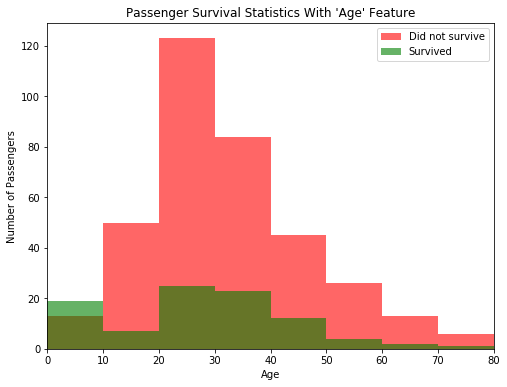

In [9]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'"])

Examining the survival statistics, the majority of males younger than 10 survived the ship sinking, whereas most males age 10 or older did not survive the ship sinking. Let's continue to build on our previous prediction: If a passenger was female, then we will predict they survive. If a passenger was male and younger than 10, then we will also predict they survive. Otherwise, we will predict they do not survive.
Fill in the missing code below so that the function will make this prediction.

생존 통계를 조사한 결과, 10세 미만의 대다수 남성은 침몰하는 배에서 살아남았지만 10세 이상의 남성은 살아남지 못하였다. 이전 예측에 기반하여 계속하자: 만약 승객이 여성이라면, 그들은 살아남을 것이라고 예측할 것이다. 승객이 남성이고 10세 미만인 경우, 우린 그들 또한 살아남을 것으로 예측하고 그렇지 않으면 살아남지 못할 것이라고 예측할 것이다.
함수가 이 예측을 할 수 있도록 아래 누락된 code를 채워라.

In [10]:
def predictions_2(data):
    """ Model with two features: 
            - Predict a passenger survived if they are female.
            - Predict a passenger survived if they are male and younger than 10. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        predictions.append(passenger['Sex'] == 'female' or passenger['Age'] < 10)
        
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_2(data)

### Question 3

*How accurate would a prediction be that all female passengers and all male passengers younger than 10 survived?

In [11]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 79.35%.


**Answer**: *Predictions have an accuracy of 79.35%.*

---
Adding the feature **Age** as a condition in conjunction with **Sex** improves the accuracy by a small margin more than with simply using the feature **Sex** alone. Now it's your turn: Find a series of features and conditions to split the data on to obtain an outcome prediction accuracy of at least 80%. This may require multiple features and multiple levels of conditional statements to succeed. You can use the same feature multiple times with different conditions.
**Pclass**, **Sex**, **Age**, **SibSp**, and **Parch** are some suggested features to try.
Use the survival_stats function below to examine various survival statistics.

**Sex**와 함께 **Age** feature 조건을 추가하면 단순히 **Sex** feature 하나만을 사용하는 것보다는 정확도가 조금 향상된다. 이제 너의 차례다: 결과 예측 정확도가 최소 80%가 되도록 data를 분할하는 일련의 feataure와 조건을 찾아라. 이를 위해서는 여러 feature들과 여러 수준의 조건문이 필요하다.
**Pclass**, **Sex**, **Age**, **SibSp**, **Parch**들은 시도해 볼만한 몇가지 추천 feature들이다.

아래의 survival_stats 함수를 사용하여 다양한 생존 통계를 조사하라.

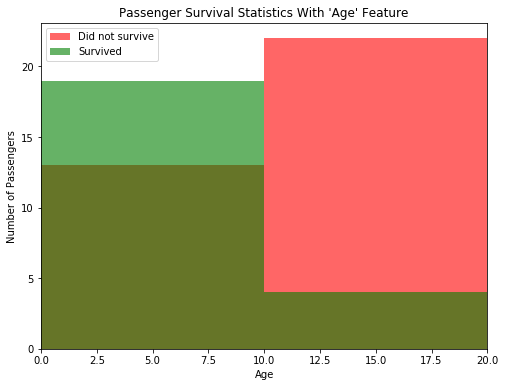

In [12]:
vs.survival_stats(data, outcomes, 'Age', ["Sex == 'male'", "Age < 18"])

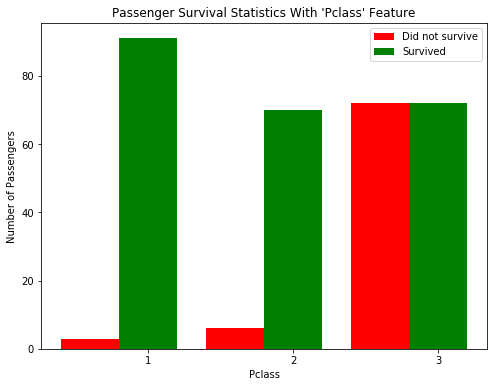

In [13]:
vs.survival_stats(data, outcomes, 'Pclass', ["Sex == 'female'"])

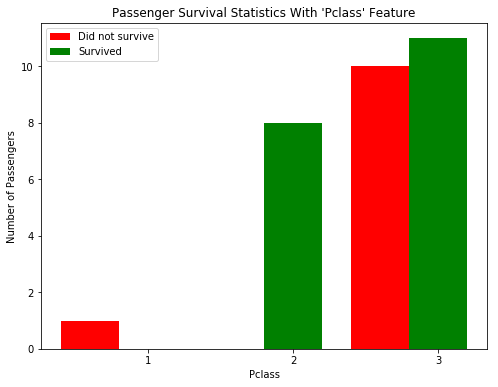

In [14]:
vs.survival_stats(data, outcomes, 'Pclass', ["Age < 10", "Sex == 'female'"])

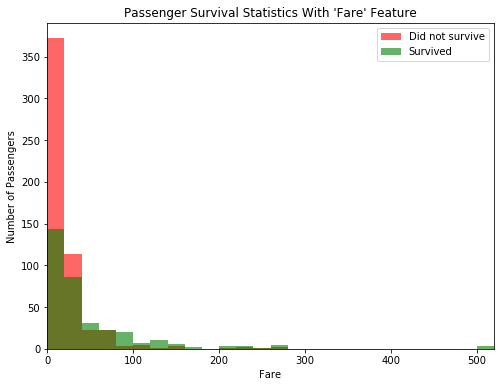

In [15]:
vs.survival_stats(data, outcomes, 'Fare')

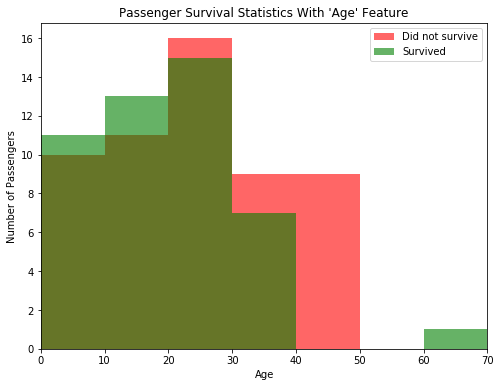

In [16]:
vs.survival_stats(data, outcomes, 'Age', ["Pclass == 3", "Sex == 'female'"])

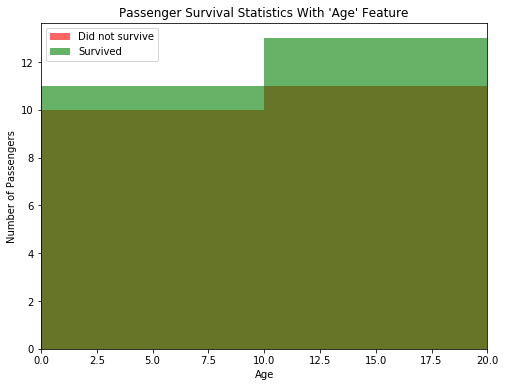

In [17]:
vs.survival_stats(data, outcomes, 'Age', ["Pclass == 3", "Sex == 'female'", "Age < 20"])

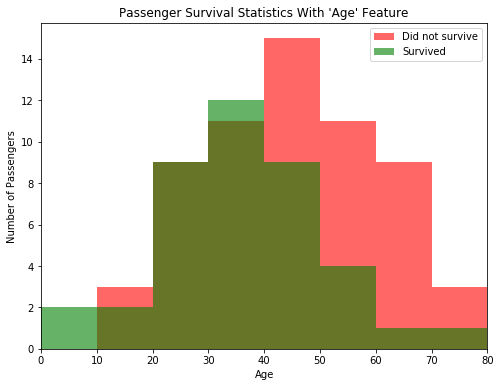

In [18]:
vs.survival_stats(data, outcomes, 'Age', ["Pclass == 1", "Sex == 'male'"])

After exploring the survival statistics visualization, fill in the missing code below so that the function will make your prediction.
Make sure to keep track of the various features and conditions you tried before arriving at your final prediction model.

생존 통계 시각화를 살펴본 후 아래 누락된 code를 입력하면 함수에서 예측을 할 것이다.
최종 예측 모델에 도달하기 전에 시도한 다양한 feature들과 조건들을 놓지지 않도록 해라.

In [19]:
def predictions_3(data):
    """ Model with multiple features. Makes a prediction with an accuracy of at least 80%. """
    
    predictions = []
    for _, passenger in data.iterrows():
        
        # Remove the 'pass' statement below 
        # and write your prediction conditions here
        if passenger['Pclass'] == 1:
            if passenger['Sex'] == 'female':
                if passenger['Age'] < 10:
                    predictions.append(0)
                else:
                    predictions.append(1)
            else:
                if passenger['Age'] < 10:
                    predictions.append(1)
                elif passenger['Age'] < 20:
                    predictions.append(0)
                elif passenger['Age'] < 40:
                    predictions.append(1)
                else:
                    predictions.append(0)
        elif passenger['Pclass'] == 2:
            if passenger['Sex'] == 'female':
                predictions.append(1)
            else:
                if passenger['Age'] < 10:
                    predictions.append(1)
                else:
                    predictions.append(0)
        else:
            if passenger['Sex'] == 'female':
                if passenger['Age'] < 20:
                    predictions.append(1)
                elif passenger['Age'] < 50:
                    predictions.append(0)
                else:
                    predictions.append(1)
            else:
                predictions.append(0)
                
                
    # Return our predictions
    return pd.Series(predictions)

# Make the predictions
predictions = predictions_3(data)

### Question 4

*Describe the steps you took to implement the final prediction model so that it got an accuracy of at least 80%. What features did you look at? Were certain features more informative than others? Which conditions did you use to split the survival outcomes in the data? How accurate are your predictions?*

In [20]:
print accuracy_score(outcomes, predictions)

Predictions have an accuracy of 81.48%.


**Answer**: *Predictions have an accuracy of 81.48%.*

## Conclusion

After several iterations of exploring and conditioning on the data, you have built a useful algorithm for predicting the survival of each passenger aboard the RMS Titanic. The technique applied in this project is a manual implementation of a simple machine learning model, the decision tree. A decision tree splits a set of data into smaller and smaller groups (called nodes), by one feature at a time. Each time a subset of the data is split, our predictions become more accurate if each of the resulting subgroups are more homogeneous (contain similar labels) than before. The advantage of having a computer do things for us is that it will be more exhaustive and more precise than our manual exploration above. [This link](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/) provides another introduction into machine learning using a decision tree.

데이터 탐색 및 조정을 여러 번 반복한 후에는 RMS Titanic에 탑승한 승객의 생존을 예측하는 유용한 알고리즘을 구축하였다. 이 프로젝트에 적용된 기술은 간단한 머신러닝 모델인 의사결정 트리(decision tree)를 수동으로 구현한 것이다. 의사결정 트리는 한 번에 하나의 기능으로 데이터 집합을 더 작고 작은 그룹(노드라고 함)으로 나눈다. 데이터의 부분 집합이 분할 될 때마다 결과 부분 집합이 이전보다 동질적(유사 label 포함)인 경우 예측이 더욱 정확해진다. 컴퓨터가 우리에게 하는 일의 장점은 위에서의 수동 탐색보다 더 철저하고 정확할 것이다. [이 링크](http://www.r2d3.us/visual-intro-to-machine-learning-part-1/)는 의사결정 트리를 사용하여 머신러닝에 대한 또 다른 소개를 제공한다.

A decision tree is just one of many models that come from supervised learning. In supervised learning, we attempt to use features of the data to predict or model things with objective outcome labels. That is to say, each of our data points has a known outcome value, such as a categorical, discrete label like 'Survived', or a numerical, continuous value like predicting the price of a house.

의사결정 트리는 지도학습에서 나온 많은 모델 중 하나일 뿐이다. 지도학습에서는 객관적인 결과 label을 사용하여 데이터를 예측하거나 모델링하는데 데이터의 feature를 사용하려고 시도한다. 즉, 각 데이터 포인트에는 'Survived'와 같은 개별적인 label 또는 집값을 예측하는 것과 같은 수치적이고 연속적인 값과 같은 결과 값이 있다.

### Question 5

Think of a real-world scenario where supervised learning could be applied. What would be the outcome variable that you are trying to predict? Name two features about the data used in this scenario that might be helpful for making the predictions.

지도학습이 적용될 수 있는 실제 시나리오를 생각해 보아라. 예측하려고 하는 결과 변수는 무엇인가. 예측하는데 도움이 될 시나리오에서 사용된 데이터에 대한 두 feature들을 지정하라.

**Answer**: *A real-world example scenario: Housing price prediction
This scenario is to predict the price of a house with two features; the 'Size' and "Bedrooms".
- Size: the size in $feet^2$.
- Bedrooms: the number of bedrooms.

In addition to these, other features may be considered.
- Floors: the number of floors.
- Age: the age of home (years).
